# Gala Baseline

In [11]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Load Data
dataset = pd.read_csv("../Apple462.csv")
dataset

# Split data from region and drop the unused data
netherlands_dataset = dataset[dataset['region'] == 'Netherland']
netherlands_dataset.drop(['Unnamed: 0', 'Envi', 'Fuji'], axis=1, inplace=True)


netherlands_dataset # Show dataframe

C:\Users\maiwi\AppData\Local\Temp\ipykernel_5240\672829825.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netherlands_dataset.drop(['Unnamed: 0', 'Envi', 'Fuji'], axis=1, inplace=True)


,Date,Gala,region
884,27/12/2015,126151.0,Netherland
885,20/12/2015,127372.0,Netherland
886,13/12/2015,81450.0,Netherland
887,6/12/2015,7041.0,Netherland
888,29/11/2015,4335.0,Netherland
...,...,...,...
3508,4/2/2018,7990.0,Netherland
3509,28/1/2018,17666.0,Netherland
3510,21/1/2018,10598.0,Netherland
3511,14/1/2018,6066.0,Netherland


In [12]:
netherlands_dataset.count() # see df count to check misvalue

Date      169
Gala      168
region    169
dtype: int64

## Fill the average value to misvalue in dataframe

In [13]:
# average Gala
avg_Gala = math.ceil(netherlands_dataset['Gala'].sum() / len(netherlands_dataset['Gala']))

print(f"Average Gala: {avg_Gala}")

# add avg in miss value
netherlands_dataset['Gala'].fillna(avg_Gala, inplace=True)

netherlands_dataset.count()

Average Gala: 32268


C:\Users\maiwi\AppData\Local\Temp\ipykernel_5240\4148005068.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netherlands_dataset['Gala'].fillna(avg_Gala, inplace=True)


Date      169
Gala      169
region    169
dtype: int64

In [14]:
netherlands_dataset

,Date,Gala,region
884,27/12/2015,126151.0,Netherland
885,20/12/2015,127372.0,Netherland
886,13/12/2015,81450.0,Netherland
887,6/12/2015,7041.0,Netherland
888,29/11/2015,4335.0,Netherland
...,...,...,...
3508,4/2/2018,7990.0,Netherland
3509,28/1/2018,17666.0,Netherland
3510,21/1/2018,10598.0,Netherland
3511,14/1/2018,6066.0,Netherland


## Graph 

Show the graph after sorted by 'Date'

In [15]:
netherlands_dataset['Date'] = pd.to_datetime(netherlands_dataset['Date']) # transform date format d/m/y to y-m-d for using sort function
netherlands_dataset = netherlands_dataset.sort_values(by='Date') # sort by date

df = netherlands_dataset.set_index('Date') # set 'Date' to id because it unique

C:\Users\maiwi\AppData\Local\Temp\ipykernel_5240\2997772964.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  netherlands_dataset['Date'] = pd.to_datetime(netherlands_dataset['Date']) # transform date format d/m/y to y-m-d for using sort function
C:\Users\maiwi\AppData\Local\Temp\ipykernel_5240\2997772964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netherlands_dataset['Date'] = pd.to_datetime(netherlands_dataset['Date']) # transform date format d/m/y to y-m-d for using sort function


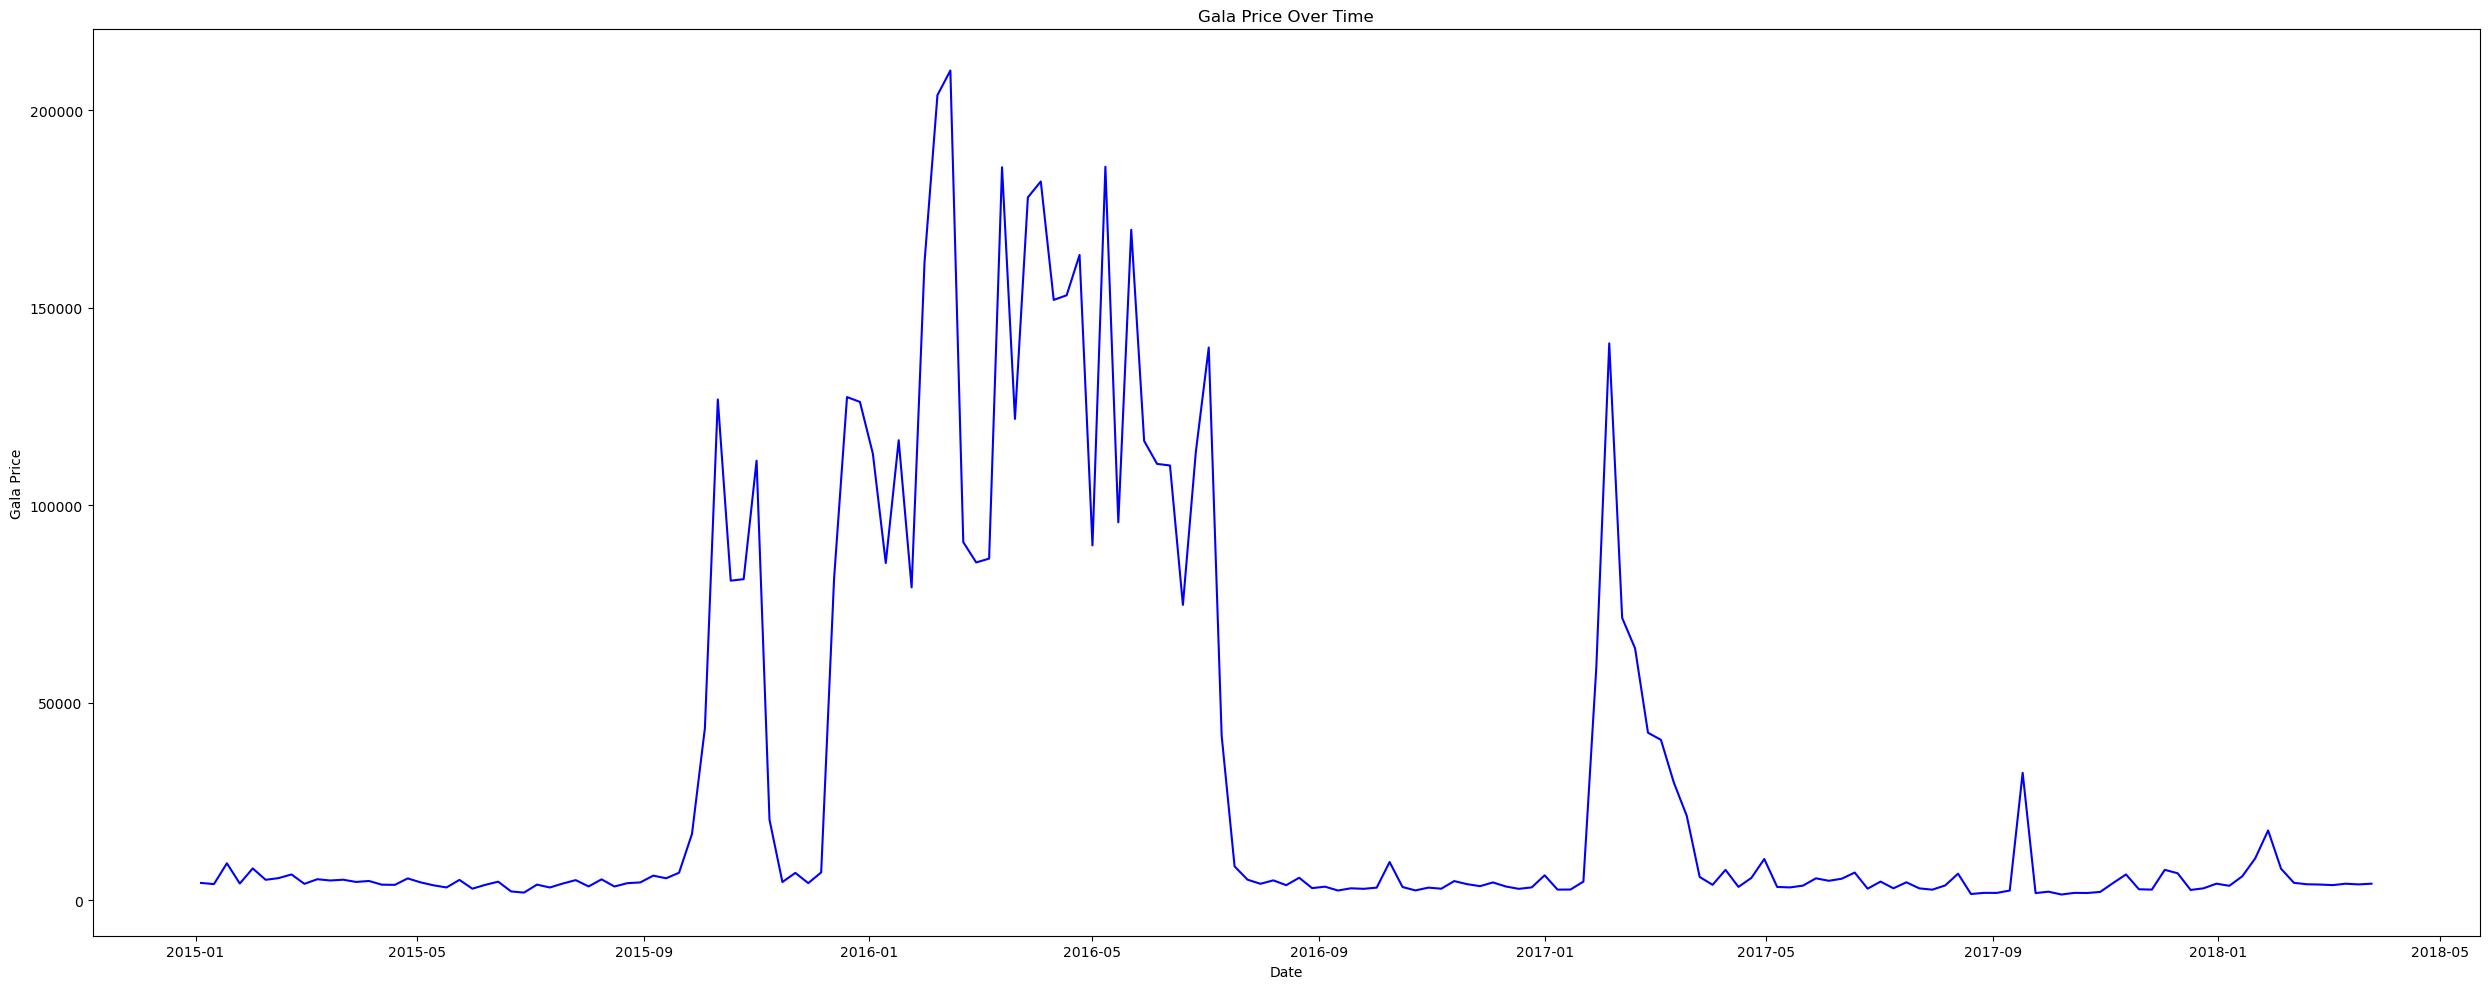

In [16]:
# graph size
plt.figure(figsize=(25, 10))
plt.plot(df.index, df['Gala'], color='b')

plt.xlabel('Date')

plt.ylabel('Gala Price')
# plt.yscale('log') # set log scale

plt.title('Gala Price Over Time')
# plt.xticks(rotation=90, fontsize=10) 
plt.tight_layout()

plt.show()

In [17]:
df['Gala_x1'] = df['Gala'].shift(-1, fill_value=0)
df['Gala_x2'] = df['Gala'].shift(-2, fill_value=0)
df['Gala_x3'] = df['Gala'].shift(-3, fill_value=0)


# df['Gala_pred'] =  (df['Gala'].shift(-1) + df['Gala'].shift(-2) + df['Gala'])  / 3

df.drop(df.tail(3).index, inplace=True)

df.drop(['region'], axis=1, inplace=True)

df

,Gala,Gala_x1,Gala_x2,Gala_x3
Date,,,,
2015-01-04,4379.0,4094.0,9354.0,4231.0
2015-01-11,4094.0,9354.0,4231.0,8063.0
2015-01-18,9354.0,4231.0,8063.0,5175.0
2015-01-25,4231.0,8063.0,5175.0,5598.0
2015-02-01,8063.0,5175.0,5598.0,6532.0
...,...,...,...,...
2018-02-04,7990.0,4407.0,4045.0,3976.0
2018-02-11,4407.0,4045.0,3976.0,3827.0
2018-02-18,4045.0,3976.0,3827.0,4184.0


## Set seed_value 

In [18]:
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)

In [19]:
# Loss Function
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


X = df.drop(['Gala'], axis=1)
y = df['Gala']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)


y_pred =  (y_test.shift(-1) + y_test.shift(-2) + y_test.shift(-3))  / 3


y_pred.fillna(avg_Gala, inplace=True)


# Show performance
MSE = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {MSE}')

MAE = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {MAE}')

R2 = r2_score(y_test, y_pred)
print(f'R2 Score: {MAE}')

Mean Squared Error: 4310958987.466667
Mean Absolute Error: 50632.05333333333
R2 Score: 50632.05333333333


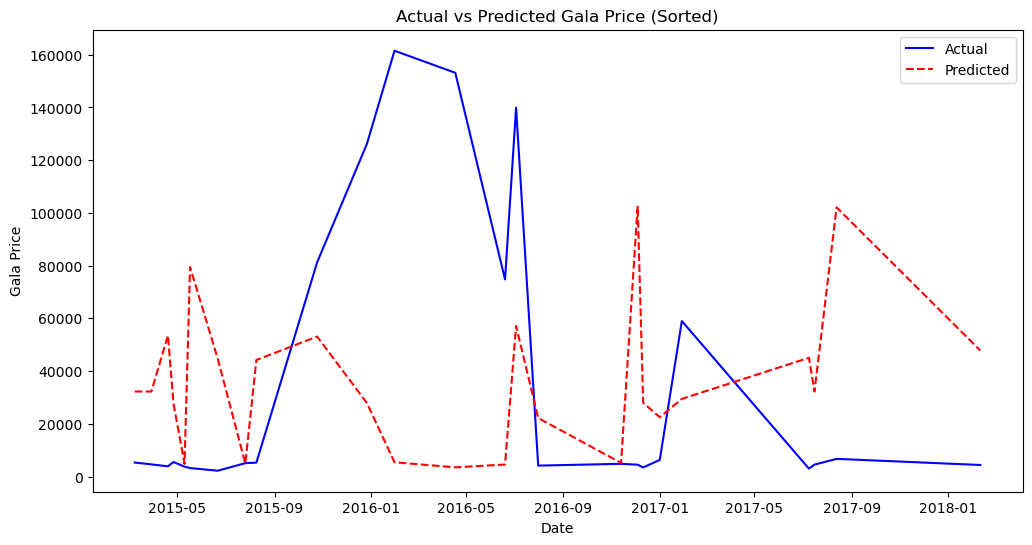

In [20]:
sorted_index = y_test.index.argsort()
y_test_sorted = y_test.iloc[sorted_index]
y_pred_sorted = y_pred.iloc[sorted_index]

plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted.index, y_test_sorted, label='Actual', color='blue')
plt.plot(y_test_sorted.index, y_pred_sorted, label='Predicted', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gala Price')
plt.title('Actual vs Predicted Gala Price (Sorted)')
plt.legend()
plt.show()
